In [17]:
# This script builds and trains a Multi-Layer Perceptron (MLP) regressor using Keras
# to predict median house values from the California Housing dataset.
# The model uses a feedforward neural network architecture with one or more hidden layers.
# The dataset features include median income, house age, average rooms, location data, etc.
# The target is a continuous value (house price), so the output layer uses a single neuron with linear activation.

from sklearn.datasets import fetch_california_housing  # Load the California housing dataset
from sklearn.model_selection import train_test_split    # Tool to split data into train/validation/test sets
from sklearn.preprocessing import StandardScaler        # Tool to scale features to standard normal distribution

# Load the dataset (features and target)
housing = fetch_california_housing()

# Split data into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

# Further split training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

# Standardize the features: zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)      # Fit on training data and transform it
X_valid = scaler.transform(X_valid)          # Use the same transformation on validation data
X_test = scaler.transform(X_test)            # Use the same transformation on test data

Epoch 1/20


d:\hands_on_machine_learning\C10 - Artificial Neural Networks with Keras\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7020 - val_loss: 0.5725
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5579 - val_loss: 0.5029
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5149 - val_loss: 0.4791
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4805 - val_loss: 0.4652
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5178 - val_loss: 0.4605
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5240 - val_loss: 0.4552
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4824 - val_loss: 0.4416
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4825 - val_loss: 0.4385
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5024 - val_loss: 0.4363
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6029 - val_loss: 0.4268
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5261 - val_loss: 0.4276
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.

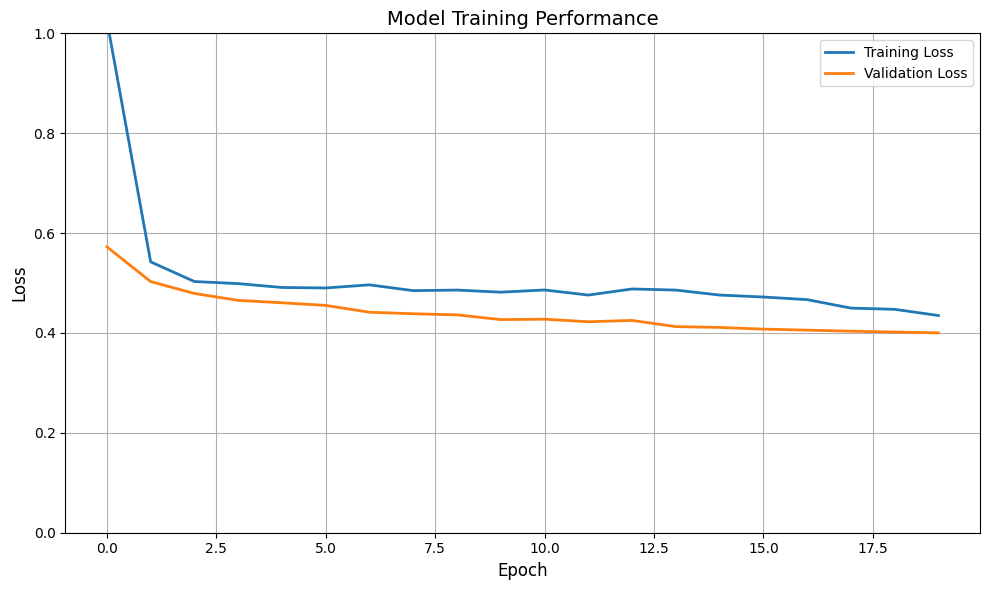

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step

The mean squared error is: 0.4176

The prediction of these 3 instances is:
[[1.9155688]
 [1.4834721]
 [1.0423794]]


In [18]:
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

# Define a simple feedforward neural network using Keras Sequential API
model = keras.models.Sequential([
    # First hidden layer with 30 neurons and ReLU activation
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    # Output layer with 1 neuron for regression (no activation = linear)
    keras.layers.Dense(1)
])

# Define a function that compiles, trains, and evaluates a regression model
def model_compile_eval(model, train_feat, train_labels, test_feat, test_labels, val_feat, val_labels):

    # Create a Stochastic Gradient Descent optimizer with a learning rate of 0.01
    # and gradient clipping by norm to prevent exploding gradients during training
    optimizer = keras.optimizers.SGD(learning_rate=0.01, clipnorm=1.0)

    # Compile the model using Mean Squared Error (MSE) as the loss function
    # and Stochastic Gradient Descent (SGD) as the optimizer
    model.compile(loss="mean_squared_error", optimizer=optimizer)

    # Train the model for 20 epochs on the training data
    # Validate its performance on the validation set after each epoch
    history = model.fit(train_feat, train_labels, epochs=20, validation_data=(val_feat, val_labels))

    # Evaluate the trained model on the test data to get the final MSE
    mse_test = model.evaluate(test_feat, test_labels)

    # Convert the training history to a DataFrame
    history_df = pd.DataFrame(history.history)

    # Create a figure and plot
    plt.figure(figsize=(10, 6))
    plt.plot(history_df["loss"], label="Training Loss", linewidth=2)
    if "val_loss" in history_df:
        plt.plot(history_df["val_loss"], label="Validation Loss", linewidth=2)

    # Add titles and labels
    plt.title("Model Training Performance", fontsize=14)
    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Loss", fontsize=12)

    # Set y-axis limits if appropriate (useful for accuracy metrics)
    plt.ylim(0, 1)

    # Add a grid, legend, and display the plot
    plt.grid(True)
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

    # Return the training history and the test set MSE
    return history, mse_test

# Call the function to compile, train, and evaluate the model
history, mse_test = model_compile_eval(model, X_train, y_train, X_test, y_test, X_valid, y_valid)

# Select the first 3 samples from the test set to simulate new/unseen input data
X_new = X_test[:3]

# Predict the target (house prices) for the selected instances
y_pred = model.predict(X_new)

# Print results
print(f"\nThe mean squared error is: {mse_test:.4}\n")
print(f"The prediction of these 3 instances is:\n{y_pred}")

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.9591 - val_loss: 0.5383
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5452 - val_loss: 0.4833
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4926 - val_loss: 0.4563
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4707 - val_loss: 0.4854
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5593 - val_loss: 0.4374
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4608 - val_loss: 0.4218
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4707 - val_loss: 0.4120
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6101 - val_loss: 0.4054
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4402 - val_loss: 0.4071
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7117 - val_loss: 0.4030
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5698 - val_loss: 0.3905
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

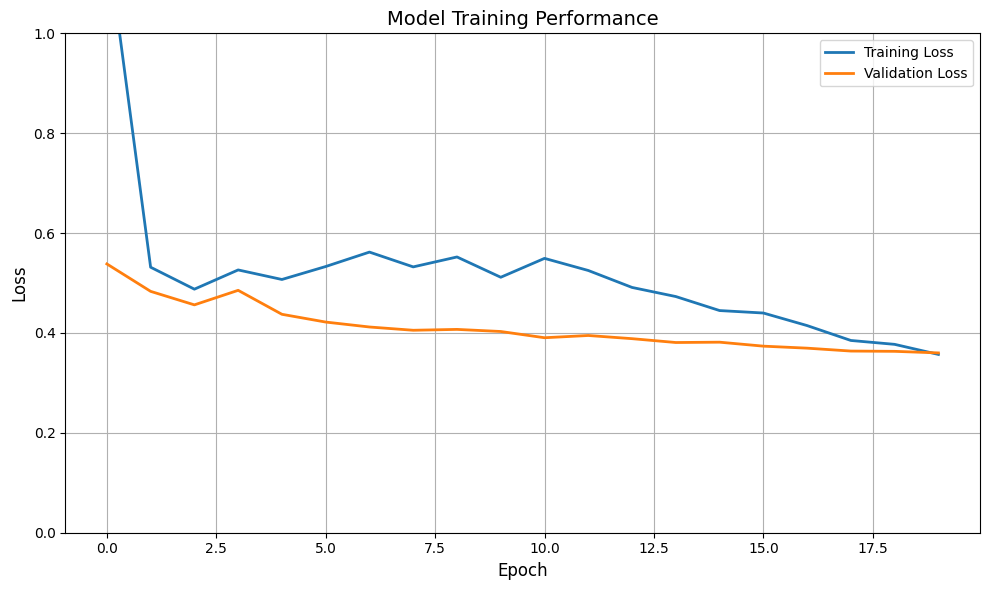

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step

The mean squared error is: 0.3702

The prediction of these 3 instances is:
[[1.9996823]
 [1.6150262]
 [1.0106328]]


In [19]:
# Let's build a nonsequential neural network using the functional API

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
X_new = scaler.transform(X_new)

# Define the input layer with the same number of features as the training data
input_ = keras.layers.Input(shape=X_train.shape[1:])

# First hidden layer with 30 neurons and ReLU activation
hidden1 = keras.layers.Dense(30, activation="relu")(input_)

# Second hidden layer with 30 neurons and ReLU, taking output from hidden1
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

# Concatenate the original input and the output of the second hidden layer
# This allows the model to use both raw input and processed features
concat = keras.layers.Concatenate()([input_, hidden2])

# Output layer with 1 neuron for regression (predicting a single continuous value)
output = keras.layers.Dense(1)(concat)

# Build the full model by specifying the input and output
model_nonseq = keras.Model(inputs=input_, outputs=output)

# Call the function to compile, train, and evaluate the model
history_nonseq, mse_test_nonseq = model_compile_eval(model_nonseq, X_train, y_train, X_test, y_test, X_valid, y_valid)

# Predict the target (house prices) for the selected instances
y_pred_nonseq = model_nonseq.predict(X_new)

# Print results
print(f"\nThe mean squared error is: {mse_test_nonseq:.4}\n")
print(f"The prediction of these 3 instances is:\n{y_pred_nonseq}")

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7889 - val_loss: 0.5056
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5041 - val_loss: 0.4813
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4532 - val_loss: 0.4589
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4631 - val_loss: 0.4530
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4394 - val_loss: 0.4404
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4345 - val_loss: 0.4290
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4236 - val_loss: 0.4459
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4195 - val_loss: 0.4248
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4137 - val_loss: 0.4112
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3915 - val_loss: 0.4122
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3886 - val_loss: 0.4043
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

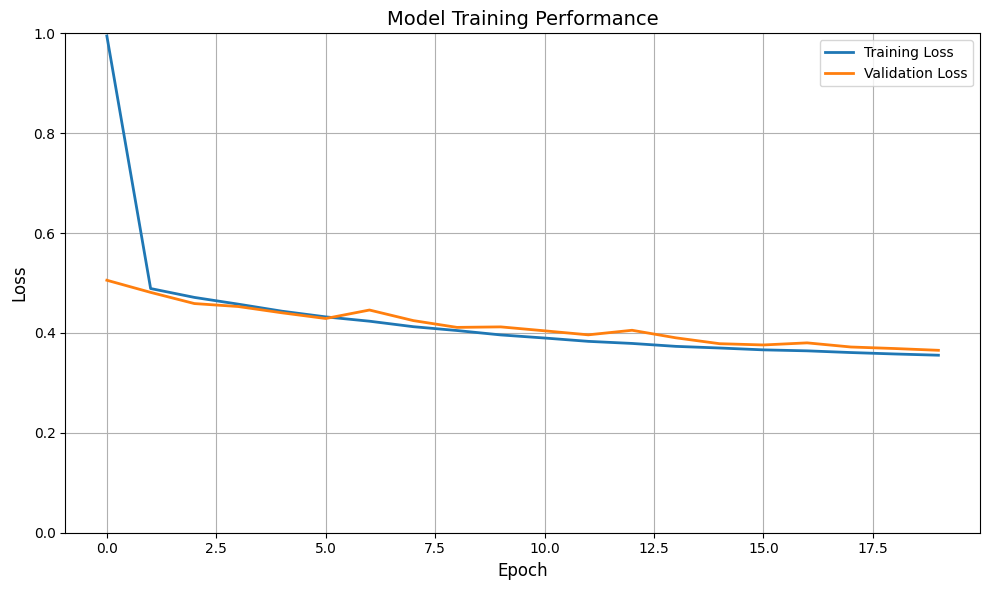

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step

The mean squared error is: 0.3642

The prediction of these 3 instances is:
[[2.447082 ]
 [1.5492272]
 [1.4206854]]


In [20]:
# Let's now take a new approach and send a subset of the features through the wide path
# and a different subset through the deep path

# Define the "wide" input layer with 5 features
input_A = keras.layers.Input(shape=[5], name="wide_input")

# Define the "deep" input layer with 6 features
input_B = keras.layers.Input(shape=[6], name="deep_input")

# First hidden layer for the deep path with 30 neurons and ReLU activation
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)

# Second hidden layer in the deep path, also with 30 neurons and ReLU
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

# Concatenate the wide input and the output of the deep path
# This combines both raw features (wide) and learned features (deep)
concat = keras.layers.concatenate([input_A, hidden2])

# Final output layer with 1 neuron (for regression or binary classification)
output = keras.layers.Dense(1, name="output")(concat)

# Define the full model with two inputs and one output
model_wide_deep = keras.Model(inputs=[input_A, input_B], outputs=[output])

# Split the training set into two parts:
# - X_train_A: first 5 features (used as "wide" input)
# - X_train_B: from feature 2 onward (used as "deep" input, overlapping features with A)
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
train_feat = (X_train_A, X_train_B)  # Combine both parts into a tuple for model input

# Do the same split for the validation set
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
val_feat = (X_valid_A, X_valid_B)  # Tuple of wide and deep inputs for validation

# Same split for the test set
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
test_feat = (X_test_A, X_test_B)  # Tuple for model evaluation on test data

# Prepare new data (e.g., samples to predict) with the same structure
X_new_A, X_new_B = X_new[:, :5], X_new[:, 2:]
new_feat = (X_new_A, X_new_B)  # Tuple for making predictions

# Call the function to compile, train, and evaluate the model
history_wide_deep, mse_test_wide_deep = model_compile_eval(model_wide_deep, train_feat, y_train, test_feat, y_test, val_feat, y_valid)

# Predict the target (house prices) for the selected instances
y_pred_wide_deep = model_wide_deep.predict(new_feat)

# Print results
print(f"\nThe mean squared error is: {mse_test_wide_deep:.4}\n")
print(f"The prediction of these 3 instances is:\n{y_pred_wide_deep}")


In [21]:
# Build a Multi-Input model with an auxiliary output to help regularize training

# Define two separate input layers: one for "wide" input features (5 features), and one for "deep" input (6 features)
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

# Create the "deep" pathway: two hidden layers with 30 neurons each and ReLU activation
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

# Concatenate the wide input directly with the deep path (after 2 hidden layers)
concat = keras.layers.concatenate([input_A, hidden2])

# Define the main output that uses both raw and processed features
main_output = keras.layers.Dense(1, name="main_output")(concat)

# Define an auxiliary output from the second hidden layer to help guide the learning process
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

# Create the model by specifying the two inputs and two outputs
model_auxout = keras.Model(inputs=[input_A, input_B], outputs=[main_output, aux_output])

# Compile the model with two loss functions (one per output)
# Assign a higher weight to the main output, since it is more important for the task
model_auxout.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

# Train the model on both outputs — both should learn to predict the same target (house value)
# Use tuples for both inputs and outputs, as the model has multiple of each
history_auxout = model_auxout.fit(
    [X_train_A, X_train_B],        # input features for both branches
    [y_train, y_train],            # same labels for both outputs
    epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])
)

# Evaluate the model: returns total loss and individual losses for each output
total_loss, main_loss, aux_loss = model_auxout.evaluate(
    [X_test_A, X_test_B],
    [y_test, y_test]
)

# Make predictions on new data (3 instances); returns predictions for both outputs
y_pred_main, y_pred_aux = model_auxout.predict([X_new_A, X_new_B])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - aux_output_loss: 4.0078 - loss: 1.5325 - main_output_loss: 1.2575 - val_aux_output_loss: 1.3631 - val_loss: 0.6449 - val_main_output_loss: 0.5652
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 1.4245 - loss: 1.0017 - main_output_loss: 0.9547 - val_aux_output_loss: 1.1316 - val_loss: 0.5456 - val_main_output_loss: 0.4805
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 1.1199 - loss: 0.5530 - main_output_loss: 0.4901 - val_aux_output_loss: 0.9769 - val_loss: 0.5209 - val_main_output_loss: 0.4702
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 0.9792 - loss: 0.5087 - main_output_loss: 0.4564 - val_aux_output_loss: 0.8585 - val_loss: 0.5078 - val_main_output_loss: 0.4689
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 0.8830 - loss: 0.5053 - main_output_loss: 0.4633 - val_aux_output_loss: 0.7719 - val_loss: 0.4761 - val_main_output_loss: 0.4433


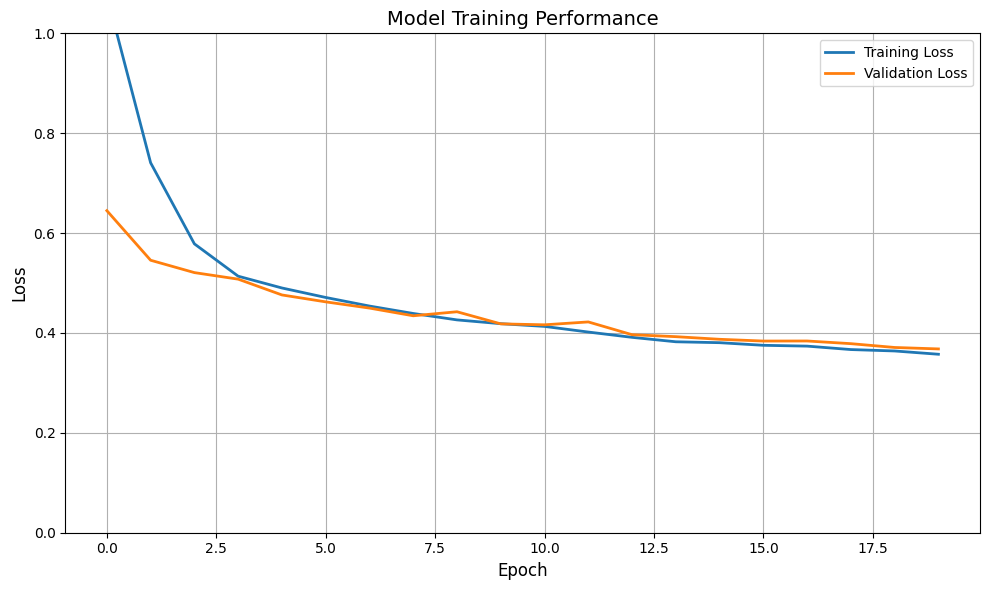

In [22]:
# Convert the training history to a DataFrame
history_df = pd.DataFrame(history_auxout.history)

    # Create a figure and plot
plt.figure(figsize=(10, 6))
plt.plot(history_df["loss"], label="Training Loss", linewidth=2)
if "val_loss" in history_df:
    plt.plot(history_df["val_loss"], label="Validation Loss", linewidth=2)

# Add titles and labels
plt.title("Model Training Performance", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)

# Set y-axis limits if appropriate (useful for accuracy metrics)
plt.ylim(0, 1)

# Add a grid, legend, and display the plot
plt.grid(True)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [23]:
# Print evaluation results and predictions
print(f"The total loss of the model is: {total_loss}")
print(f"The loss of the main output is: {main_loss}")
print(f"The loss of the auxiliary output is: {aux_loss}\n")

print(f"The prediction of the main output for these 3 instances is:\n{y_pred_main}")
print(f"The prediction of the auxiliary output for these 3 instances is:\n{y_pred_aux}")

The total loss of the model is: 0.36232882738113403
The loss of the main output is: 0.3506886661052704
The loss of the auxiliary output is: 0.4840698838233948

The prediction of the main output for these 3 instances is:
[[2.4071028]
 [1.3729547]
 [1.2296716]]
The prediction of the auxiliary output for these 3 instances is:
[[2.824222 ]
 [1.5718348]
 [1.15482  ]]


In [ ]:
# We can also use the Subclassing API for extra flexibility, although we loose observavility of the model itself
# Define a custom model using the Keras functional API with a class-based approach
class WideAndDeepModel(keras.Model):  # Inherit from keras.Model to create a custom model
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # Calls the parent class constructor to handle standard arguments like 'name'
        
        # Define the first hidden layer with the specified number of units and activation function
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        
        # Define the second hidden layer with the specified number of units and activation function
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        
        # Define the main output layer (for primary predictions)
        self.main_output = keras.layers.Dense(1)
        
        # Define the auxiliary output layer (for additional regularization or prediction task)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        # Unpack the two inputs (for example, wide input and deep input)
        input_A, input_B = inputs
        
        # Process input_B through the first hidden layer
        hidden1 = self.hidden1(input_B)
        
        # Process the result of the first hidden layer through the second hidden layer
        hidden2 = self.hidden2(hidden1)
        
        # Concatenate input_A with the output of hidden2 for the "wide and deep" model effect
        concat = keras.layers.concatenate([input_A, hidden2])
        
        # Compute the main output by passing the concatenated features through the main output layer
        main_output = self.main_output(concat)
        
        # Compute the auxiliary output using the second hidden layer
        aux_output = self.aux_output(hidden2)
        
        # Return both the main and auxiliary outputs
        return main_output, aux_output

In [27]:
# Instantiate the model
model_subclass = WideAndDeepModel()

# Compile the model with two outputs (main and auxiliary)
model_subclass.compile(optimizer='sgd', loss=["mse", "mse"], loss_weights=[0.9, 0.1])

# Train the model
history_subclass = model_subclass.fit(
    [X_train_A, X_train_B],
    [y_train, y_train],  # Using the same labels for both outputs
    epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.5104 - mse_loss: 2.3738 - val_loss: 0.6123 - val_mse_loss: 1.1383
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6053 - mse_loss: 1.0912 - val_loss: 0.5299 - val_mse_loss: 0.9692
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5355 - mse_loss: 0.9794 - val_loss: 0.5120 - val_mse_loss: 0.9404
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5097 - mse_loss: 0.9131 - val_loss: 0.5106 - val_mse_loss: 0.7892
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4915 - mse_loss: 0.8066 - val_loss: 0.4724 - val_mse_loss: 0.7318
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4674 - mse_loss: 0.7459 - val_loss: 0.4561 - val_mse_loss: 0.6787
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4470 - mse_loss: 0.6822 - val_loss: 0.4475 - val_mse_loss: 0.6413
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4251 - mse_loss: 0.6290 - val_loss: 0.4416

In [29]:
# Evaluate the model on the test data
total_loss, main_loss, aux_loss = model_subclass.evaluate([X_test_A, X_test_B], [y_test, y_test])
print(f"Total loss: {total_loss:.2}, Main output loss: {main_loss:.2}, Auxiliary output loss: {aux_loss:.2}")

# Make predictions with the trained model
y_pred_main, y_pred_aux = model_subclass.predict([X_test_A, X_test_B])

print(f"The predictions for the main output:\n{y_pred_main[:3]}")
print(f"The predictions for the auxiliary output:\n{y_pred_aux[:3]}")

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3669 - mse_loss: 0.4801
Total loss: 0.37, Main output loss: 0.47, Auxiliary output loss: 0.47
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
The predictions for the main output:
[[2.5904448]
 [1.5728027]
 [1.3650134]]
The predictions for the auxiliary output:
[[2.9081619]
 [1.3608943]
 [1.4074271]]
